In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


# Basic data cleaning (types)

In [3]:
# df = pd.read_csv('data/raw/data.csv')
df = pd.read_pickle('data/cleaned/data.pkl')
df.head(5)

,date_time,source,current,power_factor,kwh,v_red,v_blue,v_yellow,consumer_device_9,consumer_device_x,consumer_device,data_user,date
0,2024-07-22 18:20:00,consumer_device_10_data_user_1,0.08,0.72,0.000661,137.65,NaN,NaN,0,10,consumer_device_10,1,2024-07-22
1,2024-07-22 18:25:00,consumer_device_10_data_user_1,0.08,0.73,0.000598,122.82,NaN,NaN,0,10,consumer_device_10,1,2024-07-22
2,2024-07-22 18:30:00,consumer_device_10_data_user_1,0.08,0.74,0.000591,119.70,NaN,NaN,0,10,consumer_device_10,1,2024-07-22
3,2024-07-22 18:35:00,consumer_device_10_data_user_1,0.08,0.75,0.000623,124.53,NaN,NaN,0,10,consumer_device_10,1,2024-07-22
4,2024-07-22 18:40:00,consumer_device_10_data_user_1,0.08,0.74,0.000665,134.84,NaN,NaN,0,10,consumer_device_10,1,2024-07-22


In [ ]:
print(df.shape)
print(df.isna().sum() / df.shape[0])
df.describe()

(39147559, 10)


date_time            0.000000
v_red                0.646995
current              0.000000
power_factor         0.000000
kwh                  0.000000
Source               0.000000
v_blue               0.687122
v_yellow             0.665882
consumer_device_9    0.000000
consumer_device_x    0.000000
dtype: float64

In [19]:
# df[(df.v_red.notna()) & (df.v_blue.notna()) & (df.v_yellow.notna())]
# df[(df.v_blue.notna())]
# df[['v_red', 'v_blue', 'v_yellow']].isna().sum(axis=1).value_counts()
df[['v_red', 'v_blue', 'v_yellow']].describe()

,v_red,v_blue,v_yellow
count,1.381927e+07,1.224839e+07,1.307990e+07
mean,2.175315e+01,2.016875e+01,1.965710e+01
std,5.806591e+01,5.657579e+01,5.583761e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,2.400000e+02,2.400000e+02,2.400000e+02


In [10]:
df[['v_red', 'v_blue', 'v_yellow', 'current', 'power_factor', 'kwh']].corr()

,v_red,v_blue,v_yellow,current,power_factor,kwh
v_red,1.000000,NaN,NaN,0.311252,0.808973,0.312646
v_blue,NaN,1.000000,NaN,0.309735,0.841315,0.333041
v_yellow,NaN,NaN,1.000000,0.296161,0.856763,0.311009
current,0.311252,0.309735,0.296161,1.000000,0.392126,0.951809
power_factor,0.808973,0.841315,0.856763,0.392126,1.000000,0.387041
kwh,0.312646,0.333041,0.311009,0.951809,0.387041,1.000000


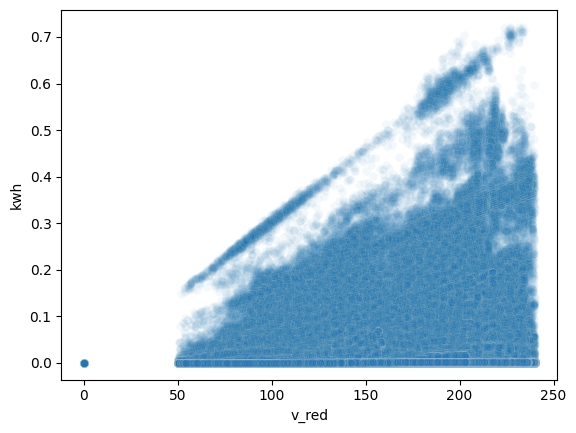

In [7]:
sns.scatterplot(x='v_red', y='kwh', data=df, alpha = 0.05)
plt.show()

In [67]:
sns.scatterplot(x='date_time', y='kwh', data=df)
plt.show()


: 

: 

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.rename({'Source' : 'source'}, axis=1)
df = df[['date_time', 'source', 'current', 'power_factor', 'kwh', 'v_red', 'v_blue', 'v_yellow', 'consumer_device_x']]
df[['consumer_device', 'data_user']] = df['source'].str.extract(r'(consumer_device_\d+)_data_user_(\d+)')

df['date'] = df['date_time'].dt.date
df.to_pickle('data/cleaned/data.pkl')

In [48]:
aggregated_data = df.groupby(['source', 'consumer_device', 'data_user', 'date'])['kwh'].sum().reset_index()
display(aggregated_data.head(20))
aggregated_data.to_pickle('data/cleaned/agg_kwh_data.pkl')

,source,consumer_device,data_user,date,kwh
0,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-22,0.024330
1,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-23,0.103560
2,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-24,0.137543
3,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-25,0.121011
4,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-26,0.000000
5,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-27,0.000000
6,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-28,0.506208
7,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-29,0.162241
8,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-30,1.361840
9,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-31,0.014254


In [10]:
aggregated_data.groupby('source').agg(
    min_date = ('date', 'min'),
    max_date = ('date', 'max')
).reset_index()

,source,min_date,max_date
0,consumer_device_10_data_user_1,2024-07-22,2024-09-23
1,consumer_device_10_data_user_10,2024-07-22,2024-09-23
2,consumer_device_10_data_user_11,2024-07-22,2024-09-23
3,consumer_device_10_data_user_12,2024-07-22,2024-09-23
4,consumer_device_10_data_user_13,2024-07-22,2024-09-23
...,...,...,...
580,consumer_device_9_data_user_5,2023-11-25,2024-09-14
581,consumer_device_9_data_user_6,2023-11-25,2024-09-14
582,consumer_device_9_data_user_7,2023-11-25,2024-09-14
583,consumer_device_9_data_user_8,2023-11-25,2024-09-14


In [12]:
df_pivot = aggregated_data.pivot(index='date', columns='source', values='kwh').reset_index()
print(df_pivot.shape)
df_pivot.head(20)
df_pivot.to_csv('data/cleaned/agg_kwh_pivot.csv')

(479, 586)


In [37]:
ss_columns = ['date'] + list(ss_ids)
df_pivot_subset = df_pivot[ss_columns]
print(df_pivot_subset.shape)
df_pivot_subset.to_csv('data/cleaned/agg_kwh_pivot_subset.csv')

(479, 195)


In [41]:
display(df_pivot_subset.isna().sum(axis=1)/df_pivot_subset.shape[0])

0      0.40501
1      0.40501
2      0.40501
3      0.40501
4      0.40501
        ...   
474    0.00000
475    0.00000
476    0.00000
477    0.00000
478    0.00000
Length: 479, dtype: float64

In [16]:
df_climate = pd.read_excel('data/raw/kalam_climate_data.xlsx')
display(df_climate.head())
display(df_climate.describe())
print(df_climate.dtypes)
df_climate.isna().sum() / df_climate.shape[0]
# df_climate.to_pickle('data/cleaned/climate_data.pkl')

,Date Time,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
0,2023-06-03 13:00:00,7.199731,-2.448126,-0.034195,0.060989,0.000377,0.0,99.972656
1,2023-06-03 14:00:00,6.000620,-2.597540,-0.080688,0.018585,0.000398,0.0,99.972656
2,2023-06-03 15:00:00,4.789972,-2.696951,0.057449,-0.352020,0.000418,0.0,99.972656
3,2023-06-03 16:00:00,3.158746,-2.879324,0.051529,-0.608948,0.000420,0.0,99.972656
4,2023-06-03 17:00:00,1.671426,-3.255606,0.056137,-0.739838,0.000420,0.0,99.972656


,Date Time,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
count,12228,12228.000000,12228.000000,12228.000000,12228.000000,12228.000000,12228.000000,12228.000000
mean,2024-02-13 06:30:00.000000256,2.613729,-3.277329,0.004090,-0.331290,0.002132,0.001013,52.396897
min,2023-06-03 13:00:00,-22.286047,-33.665594,-1.084534,-1.461945,0.000000,0.000000,0.000000
25%,2023-10-08 21:45:00,-6.249209,-11.992175,-0.085398,-0.848168,0.000002,0.000000,0.000000
50%,2024-02-13 06:30:00,4.273965,-1.358336,0.016932,-0.497864,0.000267,0.000000,60.708984
75%,2024-06-19 15:15:00,11.368826,6.559595,0.097305,0.105911,0.002039,0.000004,99.972656
max,2024-10-25 00:00:00,22.351938,17.047083,1.187332,1.483383,0.062579,0.062501,99.972656
std,NaN,10.330212,11.344587,0.222572,0.666045,0.005109,0.004730,47.690779


Date Time                    datetime64[ns]
Temperature (°C)                    float64
Dewpoint Temperature (°C)           float64
U Wind Component (m/s)              float64
V Wind Component (m/s)              float64
Total Precipitation (mm)            float64
Snowfall (mm)                       float64
Snow Cover (%)                      float64
dtype: object


Date Time                    0.0
Temperature (°C)             0.0
Dewpoint Temperature (°C)    0.0
U Wind Component (m/s)       0.0
V Wind Component (m/s)       0.0
Total Precipitation (mm)     0.0
Snowfall (mm)                0.0
Snow Cover (%)               0.0
dtype: float64

In [17]:
df_climate.columns = ['date_time', 'temp', 'dewpoint_temp', 'u_wind_comp', 'v_wind_comp',  'precipitation', 'snowfall', 'snow_cover']
df_climate['date_time'] = pd.to_datetime(df_climate['date_time'])
df_climate.to_pickle('data/cleaned/climate_data.pkl')

In [14]:
df_submission = pd.read_csv('data/raw/SampleSubmission.csv')
df_submission[['consumer_device', 'data_user']] = df_submission['ID'].str.extract(r'(consumer_device_\d+)_data_user_(\d+)')
df_submission['date'] = df_submission['ID'].str.partition('_')[0]
df_submission['source'] = df_submission['ID'].str.partition('_')[2]
df_submission.head()

,ID,kwh,consumer_device,data_user,date,source
0,2024-09-24_consumer_device_12_data_user_1,0,consumer_device_12,1,2024-09-24,consumer_device_12_data_user_1
1,2024-09-25_consumer_device_12_data_user_1,0,consumer_device_12,1,2024-09-25,consumer_device_12_data_user_1
2,2024-09-26_consumer_device_12_data_user_1,0,consumer_device_12,1,2024-09-26,consumer_device_12_data_user_1
3,2024-09-27_consumer_device_12_data_user_1,0,consumer_device_12,1,2024-09-27,consumer_device_12_data_user_1
4,2024-09-28_consumer_device_12_data_user_1,0,consumer_device_12,1,2024-09-28,consumer_device_12_data_user_1


In [31]:
print(sorted(set(aggregated_data['source'])))
print(sorted(set(df_submission['source'])))

['consumer_device_10_data_user_1', 'consumer_device_10_data_user_10', 'consumer_device_10_data_user_11', 'consumer_device_10_data_user_12', 'consumer_device_10_data_user_13', 'consumer_device_10_data_user_14', 'consumer_device_10_data_user_15', 'consumer_device_10_data_user_16', 'consumer_device_10_data_user_17', 'consumer_device_10_data_user_18', 'consumer_device_10_data_user_2', 'consumer_device_10_data_user_3', 'consumer_device_10_data_user_4', 'consumer_device_10_data_user_5', 'consumer_device_10_data_user_6', 'consumer_device_10_data_user_7', 'consumer_device_10_data_user_8', 'consumer_device_10_data_user_9', 'consumer_device_11_data_user_1', 'consumer_device_11_data_user_10', 'consumer_device_11_data_user_11', 'consumer_device_11_data_user_12', 'consumer_device_11_data_user_13', 'consumer_device_11_data_user_14', 'consumer_device_11_data_user_15', 'consumer_device_11_data_user_16', 'consumer_device_11_data_user_17', 'consumer_device_11_data_user_18', 'consumer_device_11_data_user

In [23]:
forecast_ids = set(aggregated_data['source'])
ss_ids = set(df_submission['source'])

print(len(forecast_ids))
print(len(ss_ids))

# forecast_ids = set(df['consumer_device'])
# ss_ids = set(df_submission['consumer_device'])

# Find IDs present in forecast but not in ss
forecast_only_ids = forecast_ids - ss_ids

# Find IDs present in ss but not in forecast
ss_only_ids = ss_ids - forecast_ids

# Print the IDs that are in forecast but not in ss
print("IDs in 'forecast' but not in 'ss':")
print(forecast_only_ids)
print(len(forecast_only_ids))


# Print the IDs that are in ss but not in forecast
print("\nIDs in 'ss' but not in 'forecast':")
print(ss_only_ids)
print(len(ss_only_ids))

# Print the number of IDs that differ
print(f"\nNumber of IDs that differ: {len(forecast_only_ids) + len(ss_only_ids)}")


585
194
IDs in 'forecast' but not in 'ss':
{'consumer_device_9_data_user_2', 'consumer_device_10_data_user_4', 'consumer_device_27_data_user_2', 'consumer_device_30_data_user_5', 'consumer_device_24_data_user_11', 'consumer_device_6_data_user_17', 'consumer_device_38_data_user_2', 'consumer_device_28_data_user_17', 'consumer_device_33_data_user_11', 'consumer_device_7_data_user_10', 'consumer_device_34_data_user_12', 'consumer_device_24_data_user_8', 'consumer_device_1_data_user_6', 'consumer_device_32_data_user_14', 'consumer_device_15_data_user_8', 'consumer_device_27_data_user_11', 'consumer_device_18_data_user_18', 'consumer_device_20_data_user_14', 'consumer_device_18_data_user_15', 'consumer_device_5_data_user_7', 'consumer_device_9_data_user_9', 'consumer_device_6_data_user_9', 'consumer_device_34_data_user_1', 'consumer_device_30_data_user_4', 'consumer_device_30_data_user_12', 'consumer_device_13_data_user_16', 'consumer_device_15_data_user_14', 'consumer_device_6_data_user_13

In [35]:
min_max_dates = df.groupby(["consumer_device", "data_user"]).agg(
    min_date = ('date_time', 'min'),
    max_date = ('date_time', 'max')
).reset_index()

In [50]:
min_max_dates_submission = df_submission.groupby(["data_user"]).agg(
    min_date = ('date', 'min'),
    max_date = ('date', 'max'),
    count_subs = ('ID', 'count')
).reset_index()

min_max_dates_submission.head(50)

,data_user,min_date,max_date,count_subs
0,1,2024-09-24,2024-10-24,496
1,10,2024-09-24,2024-10-24,434
2,11,2024-09-24,2024-10-24,434
3,12,2024-09-24,2024-10-24,403
4,13,2024-09-24,2024-10-24,403
5,19,2024-09-24,2024-10-24,31
6,2,2024-09-24,2024-10-24,496
7,3,2024-09-24,2024-10-24,496
8,4,2024-09-24,2024-10-24,496
9,5,2024-09-24,2024-10-24,496


In [44]:
print(df_submission.date.min())
print(df_submission.date.max())


2024-09-24
2024-10-24


In [44]:
df.groupby('data_user').agg(
    count_consumer_device = ('consumer_device', 'nunique')).reset_index()

,data_user,count_consumer_device
0,1,39
1,10,34
2,11,34
3,12,32
4,13,31
5,14,30
6,15,29
7,16,22
8,17,17
9,18,12


In [45]:
df.groupby('consumer_device').agg(
    count_nuniqu = ('data_user', 'nunique')).reset_index()

,consumer_device,count_nuniqu
0,consumer_device_1,9
1,consumer_device_10,18
2,consumer_device_11,18
3,consumer_device_12,15
4,consumer_device_13,18
5,consumer_device_14,4
6,consumer_device_15,18
7,consumer_device_16,18
8,consumer_device_17,17
9,consumer_device_18,18


In [47]:
aggregated_data

,source,date,kwh
0,consumer_device_10_data_user_1,2024-07-22,0.024330
1,consumer_device_10_data_user_1,2024-07-23,0.103560
2,consumer_device_10_data_user_1,2024-07-24,0.137543
3,consumer_device_10_data_user_1,2024-07-25,0.121011
4,consumer_device_10_data_user_1,2024-07-26,0.000000
...,...,...,...
136404,consumer_device_9_data_user_9,2024-09-10,0.000000
136405,consumer_device_9_data_user_9,2024-09-11,0.000000
136406,consumer_device_9_data_user_9,2024-09-12,0.000000
136407,consumer_device_9_data_user_9,2024-09-13,0.000000


In [54]:
aggregated_data[aggregated_data['data_user'] == '1']


,source,consumer_device,data_user,date,kwh
0,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-22,0.024330
1,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-23,0.103560
2,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-24,0.137543
3,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-25,0.121011
4,consumer_device_10_data_user_1,consumer_device_10,1,2024-07-26,0.000000
...,...,...,...,...,...
134044,consumer_device_9_data_user_1,consumer_device_9,1,2024-09-10,0.000000
134045,consumer_device_9_data_user_1,consumer_device_9,1,2024-09-11,0.000000
134046,consumer_device_9_data_user_1,consumer_device_9,1,2024-09-12,0.000000
134047,consumer_device_9_data_user_1,consumer_device_9,1,2024-09-13,0.000000


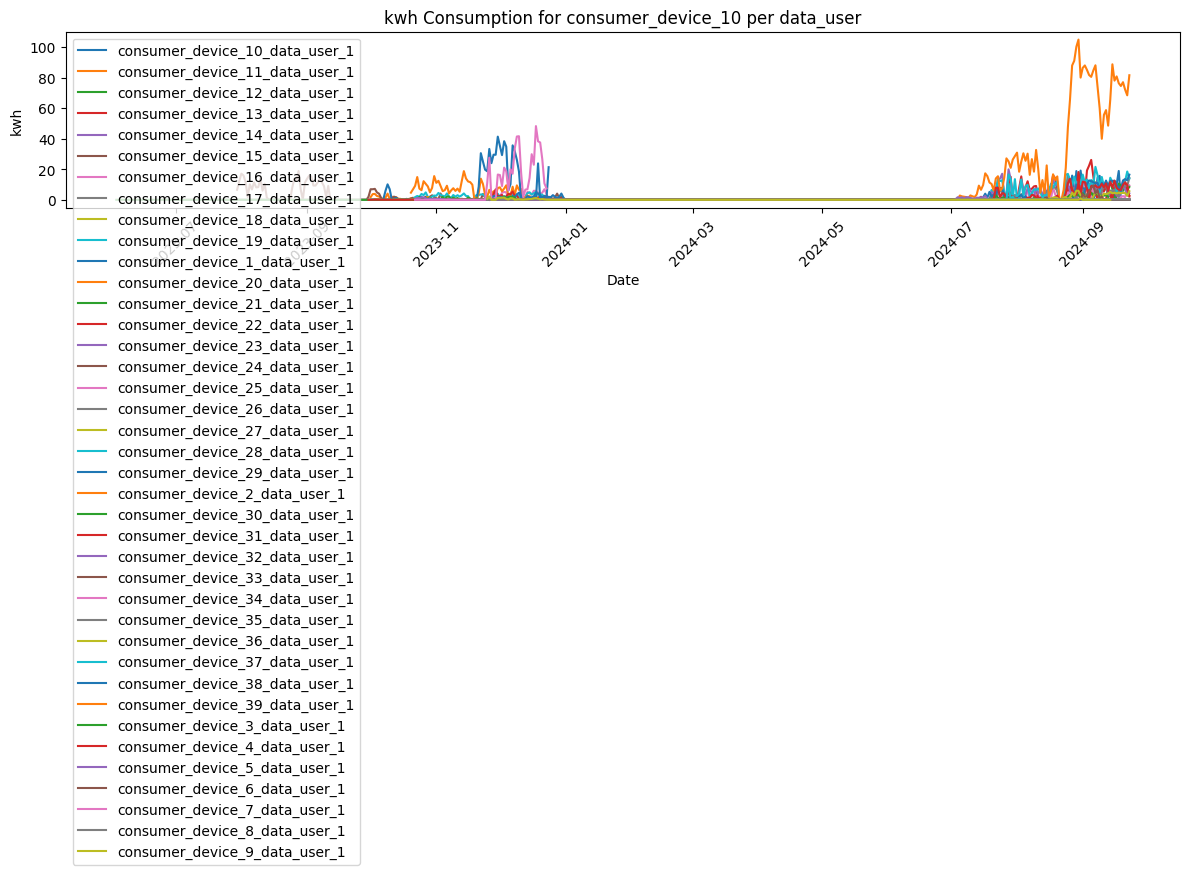

In [56]:
# Filter data for consumer_device_10
# consumer_10_data = aggregated_data[aggregated_data['Source'].str.contains('consumer_device_10')]
consumer_10_data = aggregated_data[aggregated_data['data_user'] == '1']


# Create the plot
plt.figure(figsize=(12, 6))
for data_user in consumer_10_data['source'].unique():
    user_data = consumer_10_data[consumer_10_data['source'] == data_user]
    plt.plot(user_data['date'], user_data['kwh'], label=data_user)

plt.xlabel('Date')
plt.ylabel('kwh')
plt.title('kwh Consumption for consumer_device_10 per data_user')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
aggregated_data.dtypes

source              object
consumer_device     object
data_user           object
date                object
kwh                float64
dtype: object

In [64]:
df_pivot.drop(columns=['source', 'consumer_device', 'data_user', 'date'], axis=1, errors='ignore').corr()

source,consumer_device_10_data_user_1,consumer_device_10_data_user_10,consumer_device_10_data_user_11,consumer_device_10_data_user_12,consumer_device_10_data_user_13,consumer_device_10_data_user_14,consumer_device_10_data_user_15,consumer_device_10_data_user_16,consumer_device_10_data_user_17,consumer_device_10_data_user_18,consumer_device_10_data_user_2,consumer_device_10_data_user_3,consumer_device_10_data_user_4,consumer_device_10_data_user_5,consumer_device_10_data_user_6,consumer_device_10_data_user_7,consumer_device_10_data_user_8,consumer_device_10_data_user_9,consumer_device_11_data_user_1,consumer_device_11_data_user_10,consumer_device_11_data_user_11,consumer_device_11_data_user_12,consumer_device_11_data_user_13,consumer_device_11_data_user_14,consumer_device_11_data_user_15,consumer_device_11_data_user_16,consumer_device_11_data_user_17,consumer_device_11_data_user_18,consumer_device_11_data_user_2,consumer_device_11_data_user_3,consumer_device_11_data_user_4,consumer_device_11_data_user_5,consumer_device_11_data_user_6,consumer_device_11_data_user_7,consumer_device_11_data_user_8,consumer_device_11_data_user_9,consumer_device_12_data_user_1,consumer_device_12_data_user_10,consumer_device_12_data_user_11,consumer_device_12_data_user_12,consumer_device_12_data_user_13,consumer_device_12_data_user_14,consumer_device_12_data_user_15,consumer_device_12_data_user_2,consumer_device_12_data_user_3,consumer_device_12_data_user_4,consumer_device_12_data_user_5,consumer_device_12_data_user_6,consumer_device_12_data_user_7,consumer_device_12_data_user_8,...,consumer_device_6_data_user_5,consumer_device_6_data_user_6,consumer_device_6_data_user_7,consumer_device_6_data_user_8,consumer_device_6_data_user_9,consumer_device_7_data_user_1,consumer_device_7_data_user_10,consumer_device_7_data_user_11,consumer_device_7_data_user_12,consumer_device_7_data_user_13,consumer_device_7_data_user_14,consumer_device_7_data_user_15,consumer_device_7_data_user_16,consumer_device_7_data_user_17,consumer_device_7_data_user_18,consumer_device_7_data_user_2,consumer_device_7_data_user_3,consumer_device_7_data_user_4,consumer_device_7_data_user_5,consumer_device_7_data_user_6,consumer_device_7_data_user_7,consumer_device_7_data_user_8,consumer_device_7_data_user_9,consumer_device_8_data_user_1,consumer_device_8_data_user_10,consumer_device_8_data_user_11,consumer_device_8_data_user_12,consumer_device_8_data_user_13,consumer_device_8_data_user_14,consumer_device_8_data_user_15,consumer_device_8_data_user_16,consumer_device_8_data_user_17,consumer_device_8_data_user_18,consumer_device_8_data_user_2,consumer_device_8_data_user_3,consumer_device_8_data_user_4,consumer_device_8_data_user_5,consumer_device_8_data_user_6,consumer_device_8_data_user_7,consumer_device_8_data_user_8,consumer_device_8_data_user_9,consumer_device_9_data_user_1,consumer_device_9_data_user_2,consumer_device_9_data_user_3,consumer_device_9_data_user_4,consumer_device_9_data_user_5,consumer_device_9_data_user_6,consumer_device_9_data_user_7,consumer_device_9_data_user_8,consumer_device_9_data_user_9
source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
consumer_device_10_data_user_1,1.000000,-0.036348,0.194844,-0.083335,0.141215,0.097972,0.295987,0.219761,0.027069,0.251801,0.178776,-0.085951,-0.106037,0.255726,0.178821,0.181460,0.128203,-0.183798,-0.056833,-0.042206,-0.041650,NaN,-0.022781,-0.040523,-0.041295,-0.040915,-0.040847,-0.040928,-0.039186,-0.040821,-0.045188,-0.044567,-0.044579,-0.047038,-0.048368,-0.041298,0.427743,0.418729,0.286263,0.415868,0.411994,0.307240,0.416024,0.410607,0.295524,0.499856,0.190950,0.337625,0.414458,0.411685,...,0.020696,-0.033501,-0.033360,-0.030961,-0.031146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305425,0.327655,0.339273,-0.075350,0.340105,0.339633,0.338931,0.307516,0.394069,0.338882,0.321396,0.316729,-0.190598,0.313675,0.381983,0.330071,0.321743,0.325147,0.